In [1]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

from astropy.table import Table,join,hstack,vstack
import glob
import numpy as np
import matplotlib.pyplot as plt

## Data collection: GALAH DR4 x Globular Cluster List

In [13]:
# First read in the unvalidated GALAH DR4 file
galah_dr4_raw = Table.read('../catalogs/galah_dr4_allspec_220713.fits')
galah_dr4_raw['source_id'] = galah_dr4_raw['gaiadr3_source_id']
# Read in your favourite Globular Cluster list. Keep in mind that we need tmass_id or gaia source_id as identifier
cluster_list = Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_8GCs_70percent.fits')
# Join them with the keyword
data = join(galah_dr4_raw, cluster_list, keys='source_id')

In [17]:
cluster_names = np.unique(data['cluster'])

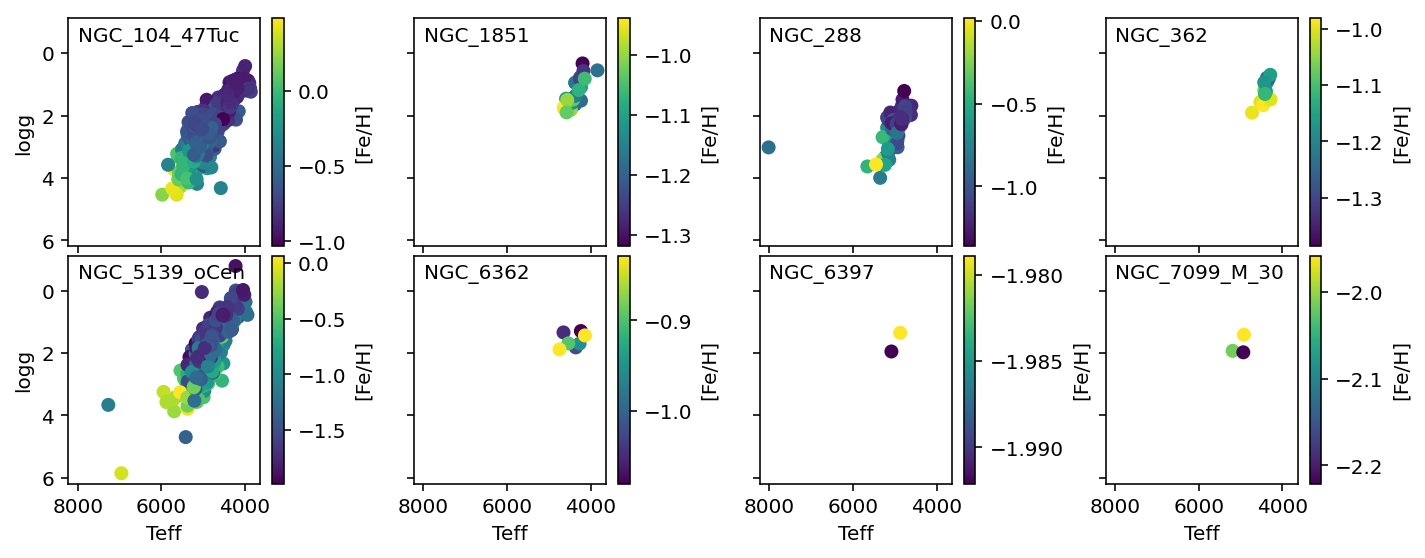

In [38]:
def plot_hrd_all_cluster(data, cluster_names):

    f, gs = plt.subplots(2,4,figsize=(10,4),sharex=True,sharey=True)
    
    for cluster_index in range(len(cluster_names)):
        
        # Preparation of the individual panels
        if cluster_index < int(len(cluster_names) / 2):
            ax = gs[0,cluster_index]
            if cluster_index == 0:
                ax.set_ylabel('logg')
        else:
            ax = gs[1,cluster_index - int(len(cluster_names) / 2)]
            if cluster_index == int(len(cluster_names) / 2):
                ax.set_ylabel('logg')
            ax.set_xlabel('Teff')
            
        ax.text(0.05,0.9,cluster_names[cluster_index],transform=ax.transAxes)
    
        select_unflagged_stars_in_cluster = (
            (data['cluster'] == cluster_names[cluster_index]) & 
            (data['flag_sp'] == 0)
        )
        
        # Plot a teff-logg diagram color-coded by [Fe/H]
        s = ax.scatter(
            data['teff'][select_unflagged_stars_in_cluster],
            data['logg'][select_unflagged_stars_in_cluster],
            c = data['fe_h'][select_unflagged_stars_in_cluster]
        )
        # Add the colorbar for [Fe/H]
        cbar = plt.colorbar(s, ax=ax)
        cbar.set_label('[Fe/H]')

    # Invert x- and y-axis
    ax.set_xlim(ax.get_xlim()[::-1])
    ax.set_ylim(ax.get_ylim()[::-1])

    plt.tight_layout(w_pad=0,h_pad=0)
    
plot_hrd_all_cluster(data,cluster_names)